Задание 1<br> https://drive.google.com/file/d/1h2H598xVrECaDgciHGZcfDggbLemy2Gw/view?usp=sharing

Задание 2<br> Данные:<br>
https://drive.google.com/file/d/123bsax1sLhIF3k3ZZfxWPa9ENvzAzVTq/view?usp=sharing<br>
https://drive.google.com/file/d/15LwA1fs85IHSy-PCKZVDLTLFikTbyMf6/view?usp=sharing<br>
https://drive.google.com/file/d/1xw2MT_2aeqQTH58qzJ3oALHdjcbj35W0/view?usp=sharing

In [1]:
! gdown --id 123bsax1sLhIF3k3ZZfxWPa9ENvzAzVTq

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=123bsax1sLhIF3k3ZZfxWPa9ENvzAzVTq
To: /content/task_2_costs.csv
100% 6.30k/6.30k [00:00<00:00, 14.8MB/s]


In [2]:
! gdown --id 15LwA1fs85IHSy-PCKZVDLTLFikTbyMf6

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15LwA1fs85IHSy-PCKZVDLTLFikTbyMf6
To: /content/task_2_installs.csv
100% 370k/370k [00:00<00:00, 22.5MB/s]


In [3]:
! gdown --id 1xw2MT_2aeqQTH58qzJ3oALHdjcbj35W0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xw2MT_2aeqQTH58qzJ3oALHdjcbj35W0
To: /content/task_2_purchases.csv
100% 19.0k/19.0k [00:00<00:00, 32.6MB/s]


We have procured installations of a mobile app.<br>
There are 3 tables:<br>
1)𝑖𝑛𝑠𝑡𝑎𝑙𝑙𝑠 (file task_2_installs.csv) - app installs<br>
𝑢𝑠𝑒𝑟_𝑖𝑑 - user id,<br>
𝑖𝑛𝑠𝑡𝑎𝑙𝑙_𝑡𝑠 - installation time,<br>
𝑐𝑎𝑚𝑝𝑎𝑖𝑔𝑛_𝑖𝑑 - id of the ad campaign that brought the user.<br>
2)𝑐𝑜𝑠𝑡𝑠 (file task_2_costs.csv) - spending on advertising campaigns<br>
𝑐𝑎𝑚𝑝𝑎𝑖𝑔𝑛_𝑖𝑑 - campaign id,<br>
𝑝𝑑𝑎𝑡𝑒 - date of spending,<br>
𝑐𝑜𝑠𝑡 - amount spent in USD.<br>
3)𝑝𝑢𝑟𝑐ℎ𝑎𝑠𝑒𝑠 (file task_2_purchases.csv) - purchases of users in the mobile app
application<br>
𝑢𝑠𝑒𝑟_𝑖𝑑 - user id,<br>
𝑝𝑢𝑟𝑐ℎ𝑎𝑠𝑒_𝑡𝑠 - time of purchase,<br>
𝑟𝑒𝑣𝑒𝑛𝑢𝑒 - the amount of the purchase in USD.<br>

Questions:<br>

1. Calculate the total accumulated ROAS (ratio of income to spending) over the number of days since enrollment.<br>
2. Build a simple ROAS forecast for 365 days of life in the application.<br>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
installs = pd.read_csv('task_2_installs.csv')

In [6]:
costs = pd.read_csv('task_2_costs.csv')

In [7]:
purchases = pd.read_csv('task_2_purchases.csv')

In [8]:
installs.head()

,user_id,install_ts,campaign_id
0,c25b3f36ef32ceaf23be7ea6d7c2b64d,2022-11-18 09:11:25.569,18725479090
1,4b2b59bb07d90ba9c11053d2603d5fe3,2022-11-18 16:17:34.011,14318431803
2,1bcb3cfea8c708ea07da2082bb2ccdb4,2022-11-18 13:09:16.406,14318431803
3,4be4a66c34e2bb1ef56aa7e26bbdc788,2022-11-18 03:13:46.472,18725479090
4,43cf00580b65f44b85ab5ea15e1b988d,2022-11-18 04:27:28.391,18725479090


In [9]:
purchases.head()

,user_id,purchase_ts,revenue
0,ca98e36115b62b26813347438dd6734a,2022-11-15 07:12:25.819192,2.06
1,55b2f341992612aa3bf3b5757065bd85,2022-11-23 23:54:37.095631,6.82
2,4dc2bb839441a865d8f03a0e0fb47758,2022-11-21 14:40:42.565536,0.00
3,cd10f5b6e13cb51b159b8e6bc37d3362,2022-11-29 12:09:10.853598,0.00
4,cd10f5b6e13cb51b159b8e6bc37d3362,2022-11-29 02:51:10.317947,3.70


In [10]:
costs.head()

,campaign_id,pdate,cost
0,18796908459,2022-11-08,18.838851
1,14883589082,2022-11-18,34.840000
2,18529088791,2022-11-13,3.089742
3,14883589082,2022-11-17,36.500000
4,18529088791,2022-11-22,14.281444


In [11]:
installs['install_ts'] = pd.to_datetime(installs['install_ts'])
purchases['purchase_ts'] = pd.to_datetime(purchases['purchase_ts'])
costs['pdate'] = pd.to_datetime(costs['pdate'])

In [12]:
#проверка на дубликаты
installs['user_id'].duplicated().any()

True

In [13]:
installs_sorted = installs.sort_values(by='install_ts')

In [14]:
installs = installs_sorted.drop_duplicates(subset='user_id', keep='first')

In [15]:
installs_purchases = installs.merge(purchases, on='user_id', how='left')

In [16]:
installs_purchases['days'] = (installs_purchases['purchase_ts'] - installs_purchases['install_ts']).dt.days

In [17]:
daily_revenue = installs_purchases.groupby('days')['revenue'].sum().reset_index()

In [18]:
installs_costs = installs.merge(costs, on='campaign_id', how='left')

In [19]:
installs_costs['days'] = (installs_costs['pdate'] - installs_costs['install_ts']).dt.days

In [20]:
installs_costs = installs_costs[installs_costs['days'] >= 0]

In [21]:
daily_costs = installs_costs.groupby('days')['cost'].sum().reset_index()

In [22]:
cumulative_data = pd.merge(daily_revenue, daily_costs, on='days', how='inner')

In [23]:
cumulative_data['cumulative_revenue'] = cumulative_data['revenue'].cumsum()
cumulative_data['cumulative_cost'] = cumulative_data['cost'].cumsum()

In [24]:
cumulative_data['cumulative_ROAS'] = cumulative_data['cumulative_revenue'] / cumulative_data['cumulative_cost']
cumulative_data.head()

,days,revenue,cost,cumulative_revenue,cumulative_cost,cumulative_ROAS
0,0.0,458.67,153217.848928,458.67,153217.848928,0.002994
1,1.0,97.59,144287.581246,556.26,297505.430174,0.001870
2,2.0,107.00,135780.705750,663.26,433286.135924,0.001531
3,3.0,19.05,127743.396775,682.31,561029.532699,0.001216
4,4.0,38.27,119914.201251,720.58,680943.733950,0.001058


In [25]:
plt.style.use('dark_background')

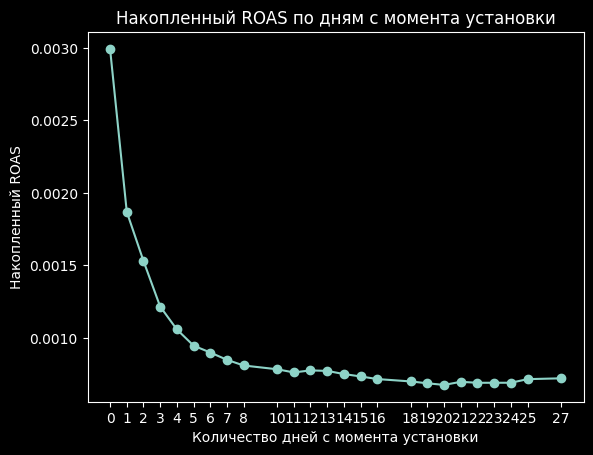

In [26]:
plt.plot(cumulative_data['days'], cumulative_data['cumulative_ROAS'], marker='o', linestyle='-')
plt.title('Накопленный ROAS по дням с момента установки')
plt.xlabel('Количество дней с момента установки')
plt.ylabel('Накопленный ROAS')
plt.xticks(cumulative_data['days'])
plt.show()

In [27]:
#исключим первые 5 дней с момента установки, чтобы снизить влияние аномальных значений
exclude_days = 5
cumulative_data_filtered = cumulative_data[exclude_days:]

In [28]:
X = cumulative_data_filtered['days'].values.reshape(-1, 1)
y = cumulative_data_filtered['cumulative_ROAS'].values

In [29]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [30]:
historical_slope = model.coef_[0]

In [31]:
future_days = np.arange(0, 365).reshape(-1, 1)
predicted_roas = model.intercept_ + historical_slope * future_days
predicted_roas = np.maximum(model.intercept_ + historical_slope * future_days, 0)

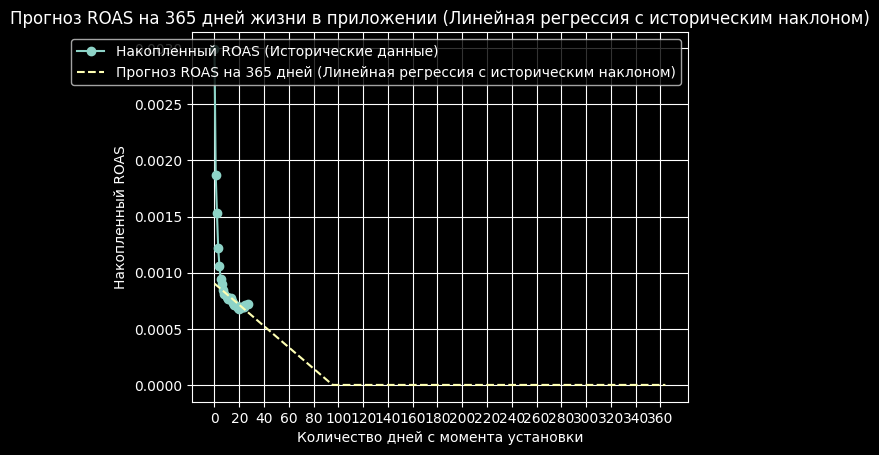

In [32]:
plt.plot(cumulative_data['days'], cumulative_data['cumulative_ROAS'], label='Накопленный ROAS (Исторические данные)', marker='o')
plt.plot(future_days, predicted_roas, label='Прогноз ROAS на 365 дней (Линейная регрессия с историческим наклоном)', linestyle='--')
plt.xlabel('Количество дней с момента установки')
plt.ylabel('Накопленный ROAS')
plt.title('Прогноз ROAS на 365 дней жизни в приложении (Линейная регрессия с историческим наклоном)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 365, step=20))
plt.show()